# Women Who Code Mission: Predictable hackathon.
## Mission: Predictable A Virtual Machine Learning Hackathon to Battle Covid-19

# Team 18 -  Bits N’ Bytes

# COVID-19/SARS B-cell Epitope Prediction
## A simple dataset for epitope prediction used in vaccine development

# Introduction about Dataset

Due to spread of COVID-19, vaccine development is being demanded as soon as possible. Despite the importance of data analysis in vaccine development, there are not many simple data sets that data analysts can handle. The B-cell epitope predictions covered by in this dataset, is one of the key research topics in vaccine development. This dataset was developed during the research process and the data contained in it was obtained from [IEDB](<https://www.iedb.org/>) and [UniProt](<https://www.uniprot.org/>). And predicting of epitope regions is beneficial for the design and development of vaccines aimed to induce antigen-specific antibody production. This dataset has 14387 number of rows for all combinations of 14362 peptides and 757 proteins.

|Column name|Description|
|:----|:----|
|parent_protein_id|parent protein ID|
|protein_seq|parent protein sequence|
|start_position|start position of peptide|
|end_position|end position of peptide|
|peptide_seq|peptide sequence|
|chou_fasman|peptide feature, β turn|
|emini|peptide feature, relative surface accessibility|
|kolaskar_tongaonkar|peptide feature, antigenicity|
|parker|peptide feature, hydrophobicity|
|isoelectric_point|protein feature|
|aromacity|protein feature|
|hydrophobicity|protein feature|
|stability|protein feature|
|target|antibody valence (target value)|

# Relevant Papers

[Epitope Prediction of Antigen Protein using Attention-Based LSTM Network (2020, bioRxiv)](<https://www.biorxiv.org/content/10.1101/2020.07.27.224121v1>)

#Inspiration

Automated methods for B-cell epitope prediction. Machine learning helps rapid vaccine development.

In [1]:
#installing necessary packages required

In [2]:
!pip install lazypredict

In [3]:
!pip install xgboost

In [4]:
!pip install catboost

In [5]:
!pip install lightgbm

In [6]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=b03fbaa0f85cc38591162b8b012bf09e0a79a8f9728b298c1bcb1681bad7d574
  Stored in directory: /tmp/pip-ephem-wheel-cache-9z2tleqg/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [7]:
#importing libraries 
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#uploading csv file for accessing it in this notebook
from google.colab import files
uploaded = files.upload()

Saving input_bcell.csv to input_bcell (1).csv


In [9]:
#reading csv file and assigning to b_cell_epitope
b_cell_epitope = pd.read_csv('input_bcell.csv')

In [10]:
#viewing the entire profile of the dataset
bcellepitope_profile = ProfileReport(b_cell_epitope)

In [11]:
bcellepitope_profile

In [12]:
#getting the overview of all the columns in the dataset
b_cell_epitope.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [13]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has 
#and memory usage.
b_cell_epitope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14387 non-null  object 
 1   protein_seq          14387 non-null  object 
 2   start_position       14387 non-null  int64  
 3   end_position         14387 non-null  int64  
 4   peptide_seq          14387 non-null  object 
 5   chou_fasman          14387 non-null  float64
 6   emini                14387 non-null  float64
 7   kolaskar_tongaonkar  14387 non-null  float64
 8   parker               14387 non-null  float64
 9   isoelectric_point    14387 non-null  float64
 10  aromaticity          14387 non-null  float64
 11  hydrophobicity       14387 non-null  float64
 12  stability            14387 non-null  float64
 13  target               14387 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


In [14]:
#just extra checking for null values
b_cell_epitope.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [15]:
#first 5 rows content of the dataset
b_cell_epitope.head()

parent_protein_id                                        protein_seq  \
0            A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1            F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2            O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3            O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4            P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0             161           165       SASFT        1.016  0.703   
1             251           255       LCLKI        0.770  0.179   
2             145           149       AHRET        0.852  3.427   
3             152           156       SNYDD        1.410  2.548   
4              85            89       DGTYR        1.214  1.908   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.018    2.22           5.810364     0.103275   
1                1.199   -3.86           6.210876     0.065476   
2                0.960    4.28           8.223938     0.091787   
3                0.936    6.32           4.237976     0.044776   
4                0.937    4.64           6.867493     0.103846   

   hydrophobicity  stability  target  
0       -0.143829  40.273300       1  
1       -0.036905  24.998512       1  
2        0.879227  27.863333       1  
3       -0.521393  30.765373       1  
4       -0.578846  21.684615       1

In [16]:
#checking for duplicates values
b_cell_epitope.duplicated().sum()

5

In [17]:
#rough checking how many times may each of the 5 values (output above) exists in the dataset
b_cell_epitope.duplicated(keep=False).sum()

10

In [18]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(b_cell_epitope.columns)
b_cell_epitope.sort_values(by=cols, inplace=True, ignore_index=True) 

In [19]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
b_cell_epitope.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [20]:
#checking everything worked well with drop_duplicates() carried out earlier on the dataset
b_cell_epitope.duplicated().sum()

0

In [21]:
#target column (dependent variable) all unique values count. It is a Binary Classification
b_cell_epitope['target'].value_counts()

0    10484
1     3898
Name: target, dtype: int64

In [22]:
#find the percentage of all the unique values in the target column (dependent variable) 
round(b_cell_epitope['target'].value_counts(normalize = True)* 100, 2)

0    72.9
1    27.1
Name: target, dtype: float64

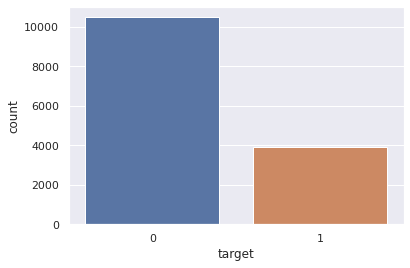

In [23]:
#visual representation of the target column (dependent variable) all unique values count
sns.set(style="darkgrid")
ax = sns.countplot(x='target',  data=b_cell_epitope)
plt.show()

In [24]:
#overview of all column names having dtype object
list(b_cell_epitope.select_dtypes(['object']).columns)

['parent_protein_id', 'protein_seq', 'peptide_seq']

In [25]:
#finding all unique value counts in each of the above 3 object columns values.

In [26]:
b_cell_epitope['parent_protein_id'].value_counts()

P10155    560
P69996    517
P05164    506
P13423    445
P15917    389
         ... 
P01213      1
P36888      1
P25440      1
P06484      1
P37173      1
Name: parent_protein_id, Length: 760, dtype: int64

In [27]:
b_cell_epitope['protein_seq'].value_counts()

MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTYYIKEQKLGLENAEALIRLIEDGRGCEVIQEIKSFSQEGRTTKQEPMLFALAICSQCSDISTKQAAFKAVSEVCRIPTHLFTFIQFKKDLKESMKCGMWGRALRKAIADWYNEKGGMALALAVTKYKQRNGWSHKDLLRLSHLKPSSEGLAIVTKYITKGWKEVHELYKEKALSVETEKLLKYLEAVEKVKRTRDELEVIHLIEEHRLVREHLLTNHLKSKEVWKALLQEMPLTALLRNLGKMTANSVLEPGNSEVSLVCEKLCNEKLLKKARIHPFHILIALETYKTGHGLRGKLKWRPDEEILKALDAAFYKTFKTVEPTGKRFLLAVDVSASMNQRVLGSILNASTVAAAMCMVVTRTEKDSYVVAFSDEMVPCPVTTDMTLQQVLMAMSQIPAGGTDCSLPMIWAQKTNTPADVFIVFTDNETFAGGVHPAIALREYRKKMDIPAKLIVCGMTSNGFTIADPDDRGMLDMCGFDTGALDVIRNFTLDMI                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [28]:
b_cell_epitope['peptide_seq'].value_counts()

ARDVLAVVSK         3
YEYLINVIHAFQYV     2
CSFWSKYIQTLK       2
FRQVGLICERMMKER    2
GTVVAVGPGRWDEDG    2
                  ..
APKEAELD           1
TPEKEEPT           1
GTVVAVGPGR         1
SEATVAESDSF        1
LLLLLALLFWLYIVM    1
Name: peptide_seq, Length: 14362, dtype: int64

In [29]:
#convert object column to category dtype
b_cell_epitope['parent_protein_id'] = b_cell_epitope['parent_protein_id'].astype('category')

#use .cat.codes to get encoded values for category dtype
b_cell_epitope['parent_protein_id'] = b_cell_epitope['parent_protein_id'].cat.codes

In [30]:
#convert object column to category dtype
b_cell_epitope['protein_seq'] = b_cell_epitope['protein_seq'].astype('category')

#use .cat.codes to get encoded values for category dtype
b_cell_epitope['protein_seq'] = b_cell_epitope['protein_seq'].cat.codes

In [31]:
#convert object column to category dtype
b_cell_epitope['peptide_seq'] = b_cell_epitope['peptide_seq'].astype('category')

#use .cat.codes to get encoded values for category dtype
b_cell_epitope['peptide_seq'] = b_cell_epitope['peptide_seq'].cat.codes

In [32]:
#overview of dataset after data pre-processing.
b_cell_epitope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14382 entries, 0 to 14381
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14382 non-null  int16  
 1   protein_seq          14382 non-null  int16  
 2   start_position       14382 non-null  int64  
 3   end_position         14382 non-null  int64  
 4   peptide_seq          14382 non-null  int16  
 5   chou_fasman          14382 non-null  float64
 6   emini                14382 non-null  float64
 7   kolaskar_tongaonkar  14382 non-null  float64
 8   parker               14382 non-null  float64
 9   isoelectric_point    14382 non-null  float64
 10  aromaticity          14382 non-null  float64
 11  hydrophobicity       14382 non-null  float64
 12  stability            14382 non-null  float64
 13  target               14382 non-null  int64  
dtypes: float64(8), int16(3), int64(3)
memory usage: 1.3 MB


In [33]:
#final pre-processing of all datapoints values in each independent variables (excluding dependent variable) for the model 
#with MinMaxScaler
from sklearn import preprocessing

minmax_b_cell_epitope = b_cell_epitope.drop('target', axis = 1)
col_name = b_cell_epitope.drop(['target'], axis = 1).columns[:]

minmax_scaler = preprocessing.MinMaxScaler()
minmax_b_cell_epitope = minmax_scaler.fit_transform(minmax_b_cell_epitope)
minmax_b_cell_epitope = pd.DataFrame(minmax_b_cell_epitope, columns = col_name)
minmax_b_cell_epitope['target'] = b_cell_epitope['target']
minmax_b_cell_epitope.head()

parent_protein_id  protein_seq  start_position  end_position  peptide_seq  \
0           0.000000     0.030423        0.102339      0.103896     0.117541   
1           0.000000     0.030423        0.103964      0.103896     0.443562   
2           0.001318     0.211640        0.011371      0.014286     0.197688   
3           0.001318     0.211640        0.012671      0.013312     0.029803   
4           0.001318     0.211640        0.018519      0.019156     0.021238   

   chou_fasman     emini  kolaskar_tongaonkar    parker  isoelectric_point  \
0     0.392292  0.018684             0.510791  0.578159           0.138372   
1     0.294466  0.023723             0.587530  0.511268           0.138372   
2     0.301383  0.018684             0.479616  0.615020           0.251835   
3     0.233202  0.007429             0.587530  0.510607           0.251835   
4     0.485178  0.051896             0.330935  0.683454           0.251835   

   aromaticity  hydrophobicity  stability  target  
0     0.149641        0.611464   0.209154       1  
1     0.149641        0.611464   0.209154       1  
2     0.434933        0.533582   0.255987       1  
3     0.434933        0.533582   0.255987       1  
4     0.434933        0.533582   0.255987       1

In [34]:
#finding each independent variables correlation with each of the unique values of dependent variable
minmax_b_cell_epitope.groupby('target').mean()

parent_protein_id  protein_seq  start_position  end_position  \
target                                                                 
0                0.451389     0.468326        0.101291      0.102951   
1                0.421353     0.487064        0.083229      0.085014   

        peptide_seq  chou_fasman     emini  kolaskar_tongaonkar    parker  \
target                                                                      
0          0.500607     0.448830  0.036410             0.441413  0.593004   
1          0.498298     0.472598  0.045904             0.433596  0.599855   

        isoelectric_point  aromaticity  hydrophobicity  stability  
target                                                             
0                0.413361     0.412077        0.475587   0.288304  
1                0.348082     0.424706        0.504030   0.297184

In [35]:
#initializing the X (independent variables) and y (dependent variable)
X = minmax_b_cell_epitope.drop('target', axis = 1)
y = minmax_b_cell_epitope['target']

In [36]:
#using StratifiedShuffleSplit to split our X (independent variables) into train and test dataset
#as it is good since our dataset has object variables which we have converted to numeric datatype for our model,
#since it returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class, 
#this ensures there won't be any/quite negligible bias prediction by the model.
#splitting train and test dataset with 80:20 ratio with one fold only.
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuffledsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in strat_shuffledsplit.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]


TRAIN: [ 1866  8332  5627 ...  5582  5707 13810] TEST: [ 411 5041 7609 ... 6165 1553 6723]


In [37]:
#LazyClassifier to get best model for our dataset

In [38]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [00:45<00:00,  1.51s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.86               0.80     0.80      0.86   
RandomForestClassifier             0.86               0.79     0.79      0.86   
LGBMClassifier                     0.84               0.76     0.76      0.83   
BaggingClassifier                  0.83               0.75     0.75      0.83   
DecisionTreeClassifier             0.79               0.74     0.74      0.79   
ExtraTreeClassifier                0.80               0.74     0.74      0.80   
LabelSpreading                     0.78               0.69     0.69      0.77   
LabelPropagation                   0.78               0.69     0.69      0.77   
XGBClassifier                      0.81               0.69     0.69      0.79   
KNeighborsClassifier               0.79               0.68     0.68      0.78   
AdaBoostClassifier                 0.78               0.66     0.66      0.76   
NuSVC                              0.78               0.64     0.64      0.75   
SVC                                0.78               0.64     0.64      0.75   
QuadraticDiscriminantAnalysis      0.73               0.60     0.60      0.71   
NearestCentroid                    0.60               0.59     0.59      0.62   
Perceptron                         0.71               0.56     0.56      0.68   
GaussianNB                         0.71               0.55     0.55      0.67   
PassiveAggressiveClassifier        0.65               0.54     0.54      0.65   
LinearDiscriminantAnalysis         0.73               0.53     0.53      0.66   
LogisticRegression                 0.73               0.53     0.53      0.65   
CalibratedClassifierCV             0.73               0.53     0.53      0.65   
LinearSVC                          0.73               0.52     0.52      0.65   
RidgeClassifier                    0.73               0.52     0.52      0.65   
RidgeClassifierCV                  0.73               0.52     0.52      0.64   
BernoulliNB                        0.73               0.51     0.51      0.63   
SGDClassifier                      0.72               0.50     0.50      0.63   
CheckingClassifier                 0.73               0.50     0.50      0.61   
DummyClassifier                    0.60               0.49     0.49      0.60   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 1.19  
RandomForestClassifier               2.73  
LGBMClassifier                       0.45  
BaggingClassifier                    1.03  
DecisionTreeClassifier               0.22  
ExtraTreeClassifier                  0.03  
LabelSpreading                      10.83  
LabelPropagation                     6.79  
XGBClassifier                        0.80  
KNeighborsClassifier                 0.49  
AdaBoostClassifier                   0.88  
NuSVC                                7.58  
SVC                                  5.83  
QuadraticDiscriminantAnalysis        0.04  
NearestCentroid                      0.03  
Perceptron                           0.04  
GaussianNB                           0.03  
PassiveAggressiveClassifier          0.05  
LinearDiscriminantAnalysis           0.08  
LogisticRegression                   0.08  
CalibratedClassifierCV               4.70  
LinearSVC                            1.19  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
BernoulliNB                          0.03  
SGDClassifier                        0.12  
CheckingClassifier                   0.03  
DummyClassifier                      0.02

In [39]:
#ExtraTreesClassifier

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve,roc_auc_score

In [41]:
#creating object of our ExtraTreesClassifier model
etc = ExtraTreesClassifier(n_estimators=250, criterion='entropy', random_state=5)

In [42]:
#training the model
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=5, verbose=0,
                     warm_start=False)

In [43]:
#finding the predicted values for test dataset
etc_pred = etc.predict(X_test)

In [44]:
#score of the model
etc.score(X_test, y_test)

0.86478971150504

In [45]:
#confusion_matrix of the model's prediction 
tn, fp, fn, tp = confusion_matrix(y_test, etc_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 524
True Negative 1964
False Positive 133
False Negative 256


In [46]:
#precision score of the model's prediction 
precision_score(y_test, etc_pred)

0.7975646879756468

In [47]:
#f1 score of the model's prediction 
f1_score(y_test, etc_pred)

0.7292971468336812

In [48]:
#roc auc score of the model's prediction 
roc_auc_score(y_test, etc_pred)

0.804185466417226

In [49]:
#creating object of our ExtraTreesClassifier model
etc_classifier = ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=5)

In [50]:
#training the model
etc_classifier.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=5, verbose=0,
                     warm_start=False)

In [51]:
#finding the predicted values for test dataset
etc_pred = etc_classifier.predict(X_test)

In [52]:
#score of the model
etc_classifier.score(X_test, y_test)

0.8668752172401808

In [53]:
#confusion_matrix of the model's prediction 
tn, fp, fn, tp = confusion_matrix(y_test, etc_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 525
True Negative 1969
False Positive 128
False Negative 255


In [54]:
#precision score of the model's prediction 
precision_score(y_test, etc_pred)

0.8039816232771823

In [55]:
#f1 score of the model's prediction 
f1_score(y_test, etc_pred)

0.732728541521284

In [56]:
#roc auc score of the model's prediction 
roc_auc_score(y_test, etc_pred)

0.8060186713620191